### Importing initial libraries

In [1]:
import investpy as inv
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (16, 8)
import pandas as pd
import seaborn as sns
%config Completer.use_jedi = False # this speeds up autocomplete

### Initial search

In [2]:
inv.get_indices_list(country= 'brazil')

['MSCI Brazil Net USD',
 'DJ Brazil',
 'TR Brazil 50',
 'MSCI Brazil Price USD',
 'DJ Brazil Titans 20 ADR',
 'BNY Mellon Brazil ADR',
 'BNY Mellon Brazil ADR TR',
 'BNY Mellon Brazil Classic ADR',
 'BNY Mellon Brazil Classic ADR TR',
 'FTSE RAFI Brazil 50',
 'MSCI Brazil 10 40',
 'DJ BRIC Brazil 15 Capped NTR',
 'DJ BRIC Brazil 15 USD',
 'DJ BRIC Brazil 15 EUR',
 'FTSE Brazil Infrastructure Extended',
 'MSCI Brazil Gross',
 'DJ Brazil Titans 20 ADR TR',
 'MSCI Brazil 25-50 Price',
 'MSCI Brazil 20-50 Gross Return',
 'MSCI Brazil 25-50 Net Return',
 'FTSE Brazil Infrastructure Extended USD PR',
 'FTSE Brazil Infrastructure Extended Total Return',
 'FTSE Brazil Infrastructure Extended Net Tax Total',
 'FTSE Brazil Infrastructure Extended Net Tax USD TR',
 'DJ BRIC Brazil 15 DR',
 'MSCI Brazil',
 'BM&FBOVESPA Unsponsored BDRX',
 'Small Cap Index',
 'Tag Along',
 'Brazil broad-Based',
 'Brazil Index',
 'Mid-Large Cap Index',
 'Public Utilities',
 'BM&FBOVESPA Real Estate IFIX',
 'Financia

### Getting Bovespa, IFIX, Electrical Energy, Real Estate, Basic Materials and Industrial Sector

In [3]:
# Ibovespa
ibov = inv.get_index_historical_data('Bovespa', country = 'brazil',
                                    from_date = '01/01/2014', to_date = '31/12/2020',
                                    interval = 'Monthly')
ibov = ibov[['Close']]

In [4]:
# IFIX
ifix = inv.get_index_historical_data('BM&FBOVESPA Real Estate IFIX', country = 'brazil',
                                    from_date = '01/01/2014', to_date = '31/12/2020',
                                    interval = 'Monthly')
ifix = ifix[['Close']]

In [5]:
# Electrical Energy
elec_energy = inv.get_index_historical_data('Electrical Energy', country = 'brazil',
                                    from_date = '01/01/2014', to_date = '31/12/2020',
                                    interval = 'Monthly')
elec_energy = elec_energy[['Close']]

In [6]:
# Real Estate
real_estate = inv.get_index_historical_data('Real Estate', country = 'brazil',
                                    from_date = '01/01/2014', to_date = '31/12/2020',
                                    interval = 'Monthly')
real_estate = real_estate[['Close']]

In [7]:
# Basic Materials
basic_materials = inv.get_index_historical_data('Basic Materials', country = 'brazil',
                                    from_date = '01/01/2014', to_date = '31/12/2020',
                                    interval = 'Monthly')
basic_materials = basic_materials[['Close']]

In [8]:
# Industrial Sector
industrial = inv.get_index_historical_data('Industrial Sector', country = 'brazil',
                                    from_date = '01/01/2014', to_date = '31/12/2020',
                                    interval = 'Monthly')
industrial = industrial[['Close']]

### Joining the data

In [9]:
indices_data = pd.DataFrame()

indices_data['ibov'] = ibov['Close']
indices_data['ifix'] = ifix['Close']
indices_data['elec_energy'] = elec_energy['Close']
indices_data['real_estate'] = real_estate['Close']
indices_data['basic_materials'] = basic_materials['Close']
indices_data['industrial'] = industrial['Close']

In [10]:
indices_data

,ibov,ifix,elec_energy,real_estate,basic_materials,industrial
Date,,,,,,
2014-01-01,47639.0,1282.04,25207.56,613.34,1826.85,11499.56
2014-02-01,47094.4,1330.42,23057.55,631.93,1644.58,11164.86
2014-03-01,50414.9,1336.07,24838.77,667.26,1645.85,11450.31
2014-04-01,51626.7,1350.76,25845.08,650.97,1512.42,11271.70
2014-05-01,51239.3,1369.25,26328.72,645.66,1482.96,11191.81
...,...,...,...,...,...,...
2020-08-01,99369.2,2782.10,71966.61,962.80,4023.79,19864.94
2020-09-01,94603.4,2794.88,68569.31,885.71,4044.75,19513.57
2020-10-01,93952.4,2766.76,69951.35,863.71,4316.32,19822.50


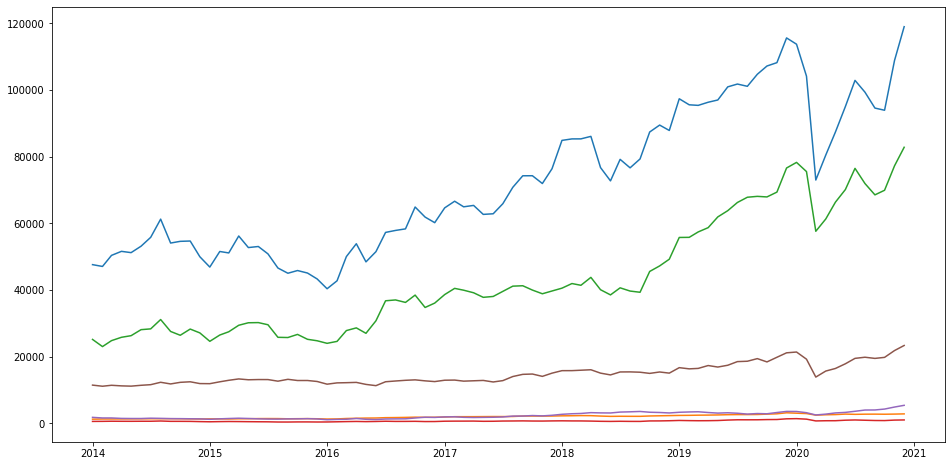

In [11]:
plt.plot(indices_data)
plt.show()

<AxesSubplot:>

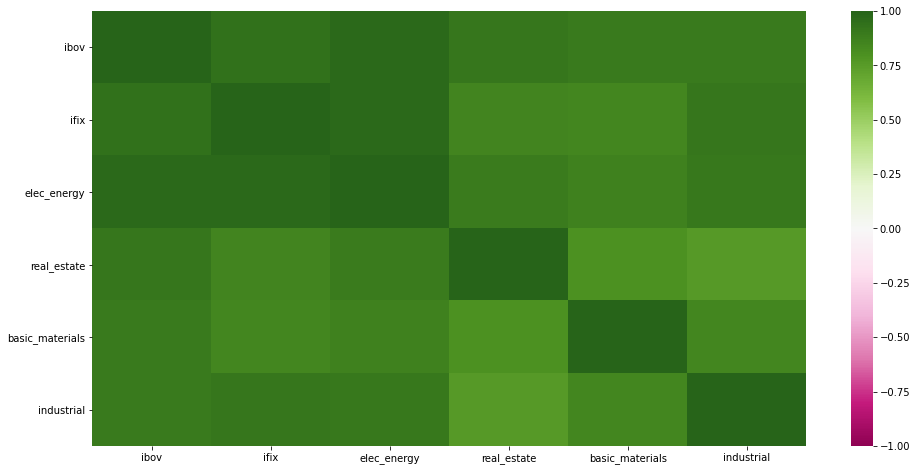

In [14]:
# Creating correlation object: corr
corr = indices_data.corr('spearman')

# Without values
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            cmap = "PiYG",
            vmin = -1, vmax = 1,
            annot = False # this argument must be 'False'
           )

<AxesSubplot:>

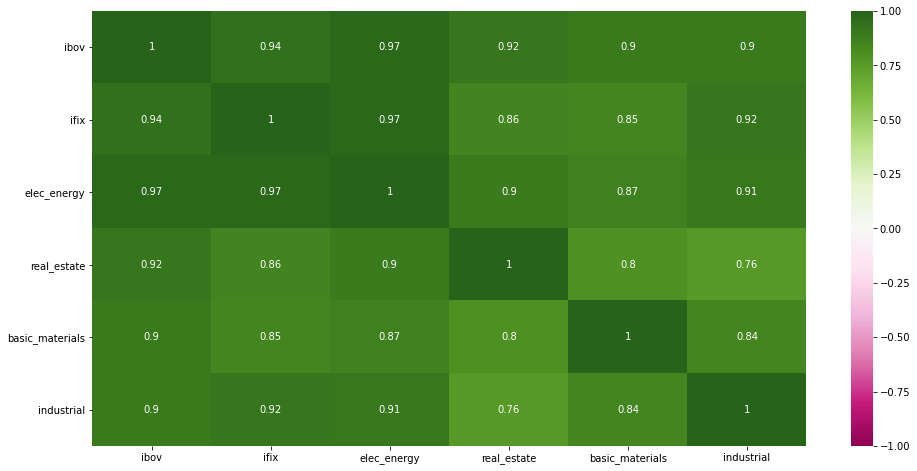

In [15]:
# With values
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            cmap = "PiYG",
            vmin = -1, vmax = 1,
            annot = True # this argument must be 'True'
           )